In [1]:
!pip install stanza
!pip install indic-nlp-library

In [2]:
import os
import stanza
from indicnlp.tokenize import indic_tokenize
import re

In [3]:
stanza.download("te")
telugu_nlp = stanza.Pipeline("te", processors="tokenize,pos,lemma,depparse")

2024-07-04 15:26:03 INFO: Downloaded file to C:\Users\chakr\stanza_resources\resources.json
2024-07-04 15:26:03 INFO: Downloading default packages for language: te (Telugu) ...
2024-07-04 15:26:04 INFO: File exists: C:\Users\chakr\stanza_resources\te\default.zip
2024-07-04 15:26:07 INFO: Finished downloading models and saved to C:\Users\chakr\stanza_resources
2024-07-04 15:26:07 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-07-04 15:26:10 INFO: Downloaded file to C:\Users\chakr\stanza_resources\resources.json
2024-07-04 15:26:11 INFO: Loading these models for language: te (Telugu):
| Processor | Package    |
--------------------------
| tokenize  | mtg        |
| pos       | mtg_charlm |
| lemma     | identity   |
| depparse  | mtg_charlm |

2024-07-04 15:26:11 INFO: Using device: cpu
2024-07-04 15:26:11 INFO: Loading: tokenize
2024-07-04 15:26:13 INFO: Loading: pos
2024-07-04 15:26:13 INFO: Loading: lemma
2024-07-04 15:26:13 INFO: Loading: depparse
2024-07-04 15:26:14 INFO: Done loading processors!


In [4]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [5]:
def tokenize_telugu(text):
    return indic_tokenize.trivial_tokenize(text)

In [6]:
import os
import csv

all_triplets = []
telugu_stop_words = set([
    'అందరు', 'అప్పుడు', 'అయితే', 'ఇప్పటికే', 'అందులో', 'అందుకే', 'ఇంకా', 'ఇప్పటికీ', 'కానీ', 'కేవలం', 'గురించి', 'జరిగిన', 'ఇచ్చిన', 'ఎవరూ', 'ఇక్కడ', 'అందువల్ల',
    'అలాగే', 'ఆయన', 'ఎందుకంటే', 'ఎందుకు', 'ఎక్కడ', 'కూడా', 'తో పాటు', 'నుండి', 'తర్వాత', 'తర్వాతే', 'తీసుకుని', 'తన', 'తమ', 'తమకు', 'తనకు', 'లేదా',
    'వీరు', 'వీటిని', 'వారు', 'వీళ్ళు', 'వీరే', 'ఇతర', 'వాళ్ళు', 'అప్పటి', 'మరియు', 'ఇంత', 'తాము', 'అది', 'అంటే', 'అన్నా', 'ఇవ్వడం', 'కాదు', 'వాడు', 'అయినా',
    'అలా', 'మరి', 'కాని', 'ఎప్పుడూ', 'కనుక', 'ఇచ్చి', 'అప్పట్లో', 'అవును', 'అప్పుడప్పుడు', 'ఇది', 'ఉంటే', 'కూడా', 'ఎందుకంటే', 'కాని', 'ఎక్కువ', 'మాత్రం',
    'వంటి', 'ఉన్న', 'ఉంది', 'వచ్చిన', 'కి', 'మీ'
])files = /content/drive/My Drive/Dataset_N190457

def extracting_triplets():
    # Specify the maximum number of files to process
    max_files = 1000
    # Counter to keep track of the number of files processed
    processed_count = 0

    for filename in os.listdir(files):
        if filename.endswith(".txt"):
            file_path = os.path.join(files, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                article_text = file.read()

            # Tokenize Telugu text
            telugu_tokens = tokenize_telugu(article_text)

            # Process Telugu text using Stanza
            doc = telugu_nlp(' '.join(telugu_tokens))
            for word in sent.words:
                    if sc <= 1 and rc <= 0 and (word.deprel == 'nsubj' or word.upos in ['NOUN', 'PROPN']):  # Subject
                        if word.text not in telugu_stop_words:
                            sub += word.text + " "
                            sc += 1
                    elif word.deprel in ['obj', 'dobj', 'iobj', 'pobj', 'obl']:  # Object
                        if word.text not in telugu_stop_words:
                            obj += word.text + " "
                            oc += 1
                    elif word.deprel == 'root' or word.upos in ['AUX']:#ADV', 'ADP']:  # Relation
                        if word.text not in telugu_stop_words:
                            rel += word.text + " "
                            rc += 1

                # Strip trailing spaces and append entities and relations to the all_triplets list
                if sub.strip() and obj.strip() and rel.strip():
                    all_triplets.append([sub.strip(), rel.strip(), obj.strip()])

            processed_count += 1
            if processed_count >= max_files:
                break


    return all_triplets

# Call the function to process the files
triplets = extracting_triplets()
# Define the CSV file path
csv_file_path = '/content/drive/My Drive/triplets190457.csv'

# Write the output to a CSV file
with open(csv_file_path, mode='w', encoding='utf-8', newline='') as csv_file:
    writer = csv.writer(csv_file)
    # Write the header
    writer.writerow(['Subject', 'Relation', 'Object'])
    # Write the triplets
    for triplet in triplets:
        writer.writerow(triplet)

print(f"Triplets have been written to {csv_file_path}")


'import os\nimport csv\n\nall_triplets = []\ntelugu_stop_words = set([\n    \'అందరు\', \'అప్పుడు\', \'అయితే\', \'ఇప్పటికే\', \'అందులో\', \'అందుకే\', \'ఇంకా\', \'ఇప్పటికీ\', \'కానీ\', \'కేవలం\', \'గురించి\', \'జరిగిన\', \'ఇచ్చిన\', \'ఎవరూ\', \'ఇక్కడ\', \'అందువల్ల\',\n    \'అలాగే\', \'ఆయన\', \'ఎందుకంటే\', \'ఎందుకు\', \'ఎక్కడ\', \'కూడా\', \'తో పాటు\', \'నుండి\', \'తర్వాత\', \'తర్వాతే\', \'తీసుకుని\', \'తన\', \'తమ\', \'తమకు\', \'తనకు\', \'లేదా\',\n    \'వీరు\', \'వీటిని\', \'వారు\', \'వీళ్ళు\', \'వీరే\', \'ఇతర\', \'వాళ్ళు\', \'అప్పటి\', \'మరియు\', \'ఇంత\', \'తాము\', \'అది\', \'అంటే\', \'అన్నా\', \'ఇవ్వడం\', \'కాదు\', \'వాడు\', \'అయినా\',\n    \'అలా\', \'మరి\', \'కాని\', \'ఎప్పుడూ\', \'కనుక\', \'ఇచ్చి\', \'అప్పట్లో\', \'అవును\', \'అప్పుడప్పుడు\', \'ఇది\', \'ఉంటే\', \'కూడా\', \'ఎందుకంటే\', \'కాని\', \'ఎక్కువ\', \'మాత్రం\',\n    \'వంటి\', \'ఉన్న\', \'ఉంది\', \'వచ్చిన\', \'కి\', \'మీ\'\n])files = /content/drive/My Drive/Dataset_N190457\n\ndef extracting_triplets():\n    # Specify the maximum n

In [7]:
import csv

# Define the CSV file path
file_path =  "C:\\Users\\chakr\\Downloads\\triplets190457.csv"

def read_triplets(file_path):
    triplets = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row if there is one
        for row in reader:
            if len(row) == 3:
                triplets.append(tuple(row))
    return triplets

triplets = read_triplets(file_path)
print(triplets[:5])  # Print the first 5 triplets to verify

[('గుంటూరు జాతీయ', 'ఆలయం', 'రహదారికి మైదానంలో'), ('ప్రపంచంలో మంగళ', 'కనిపించదు', 'మనకు'), ('శ్రీ భూసమేత', 'పేర్కొంటున్నారు', 'తలమానికంగా'), ('ఏడుకొండలపై కొలువై', 'చేసింది', 'అమరావతి'), ('శ్రీ గ\u200cణ\u200cప\u200cతి', 'జ\u200cరిగింది', 'ఆశిస్సుల\u200cతో ఆల\u200cయ')]


In [8]:
type(triplets[0])

tuple

In [9]:
len(triplets)

15378

In [10]:
triplets

[('గుంటూరు జాతీయ', 'ఆలయం', 'రహదారికి మైదానంలో'),
 ('ప్రపంచంలో మంగళ', 'కనిపించదు', 'మనకు'),
 ('శ్రీ భూసమేత', 'పేర్కొంటున్నారు', 'తలమానికంగా'),
 ('ఏడుకొండలపై కొలువై', 'చేసింది', 'అమరావతి'),
 ('శ్రీ గ\u200cణ\u200cప\u200cతి',
  'జ\u200cరిగింది',
  'ఆశిస్సుల\u200cతో ఆల\u200cయ'),
 ('లింగ\u200cమ\u200cనేని పూర్ణ\u200cభాస్క\u200cర్\u200c',
  'చేప\u200cట్టారు',
  'ఆశ\u200cయంతో'),
 ('కలియుగ దేవదేవుని', 'వచ్చింది', 'నిత్యం సంవత్సరంలో 2006లో కార్యకరూపానికి'),
 ('2006లో గణపతి', 'చుట్టారు', 'అనుమతితో'),
 ('2012లో శ్రీ', 'జరిగింది', 'చేతుల'),
 ('మొత్తం ఆలయ', 'జరిగింది', 'పర్యవేక్షణలో'),
 ('సుబ్రమణ్య ఆచార్యులు', 'విశేషం', 'రాతితోనే'),
 ('తూర్పుగోదావరి జిల్లా', 'అడుగుల', 'గ్రామానికి'),
 ('అంగుళాల ఎత్తైన', 'నిర్మించారు', 'ధ్వజస్తంభాన్ని'),
 ('దేవాలయానికి భాగంలో', 'చేశారు', 'నిమిత్తం వేదికతో'),
 ('శ్రీవారి పాదాలతోనూ', 'దర్శనమిస్తుంది', 'కూర్మావతారంలోనూ'),
 ('హన్మకొండలో రెవెన్యూ', 'నివాసముంటోంది', 'కాలనీకి ఇంటిలో'),
 ('2015 తెల్లవారుఝామున', 'మంటలు', 'నడకకు'),
 ('రోజు రాత్రి', 'వ్యాపించింది', 'సారికకు కుటుం

                  Subject         Relation             Object  sub_id rel_id  \
0           గుంటూరు జాతీయ             ఆలయం  రహదారికి మైదానంలో    2390     r1   
1          ప్రపంచంలో మంగళ        కనిపించదు               మనకు   12286     r2   
2             శ్రీ భూసమేత  పేర్కొంటున్నారు         తలమానికంగా   14684     r3   
3       ఏడుకొండలపై కొలువై          చేసింది            అమరావతి    6916     r4   
4           శ్రీ గ‌ణ‌ప‌తి        జ‌రిగింది   ఆశిస్సుల‌తో ఆల‌య   13140     r5   
...                   ...              ...                ...     ...    ...   
15373         సంచార వైద్య             లేరు              శాలలో    5334    r73   
15374    గ్రామంలో కుళాయిల       జరుగుతోంది              సరఫరా    3603    r58   
15375  గ్రామంలో పారిశుధ్య       అమలవుతోంది               పథకం    9697    r62   
15376  వ్యర్థాలను వ్యవస్థ             లేదు          ఇంటింటికీ   13498    r63   
15377   గంటల వ్యవసాయానికి     చేస్తున్నారు               కోసం      75    r64   

       obj_id  
0       13830  
1      

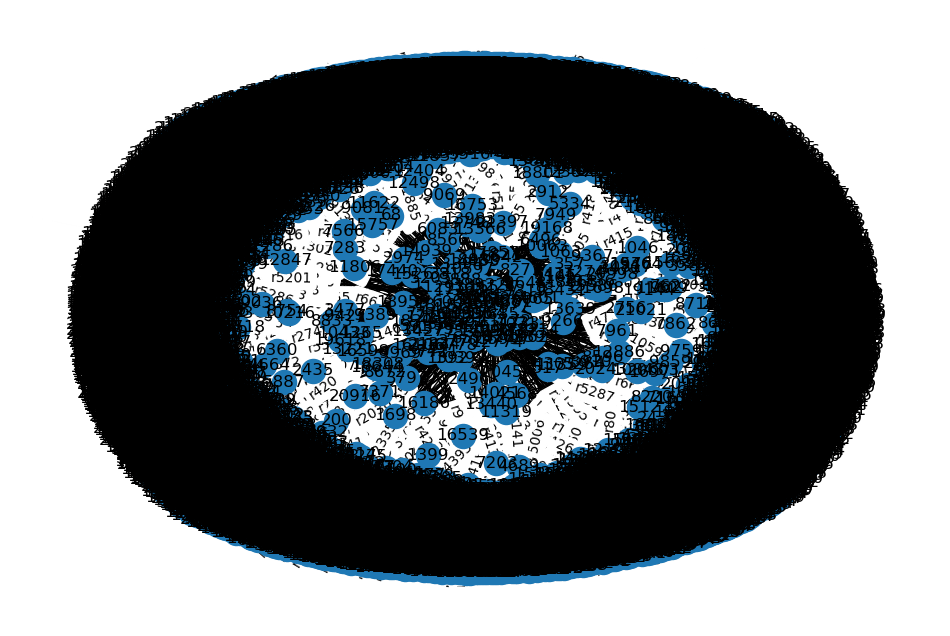

In [53]:
import os
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

# Step 3: Creating a Graph
def create_graph(triplets):
    G = nx.Graph()
    for triplet in triplets:
        subject, relation, obj = triplet
        G.add_edge(subject, obj)
    return G

# Main function
def main(data_dir):

    graph = create_graph(triplets)
    df = pd.DataFrame(triplets, columns=['Subject', 'Relation', 'Object'])

    # print(df)

    all_nodes = set(graph.nodes)
    nodes_related_id = [i+1 for i in range(len(all_nodes))]
    node_ids = dict(zip(all_nodes , nodes_related_id))

    relation_list = list(df['Relation'].unique())
    relation_related_ids = [f"r{i+1}" for i in range(len(relation_list))]
    relation_ids = dict(zip(relation_list , relation_related_ids))

    sub_id = []
    for sub in df['Subject']:
      sub_id.append(node_ids[sub])
    df['sub_id'] = sub_id

    rel_id = []
    for rel in df['Relation']:
      rel_id.append(relation_ids[rel])
    df['rel_id'] = rel_id

    obj_id = []
    for obj in df['Object']:
      obj_id.append(node_ids[obj])
    df['obj_id'] = obj_id

    print(df)
    G = nx.DiGraph()

    # Add nodes and edges to the graph
    for index, row in df.iterrows():
      # print(index , row)
        G.add_edge(row['sub_id'], row['obj_id'], label=row['rel_id'])


    # Draw the graph
    fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the size here
    pos = nx.spring_layout(G, seed=42)  # positions for all nodes, using a fixed seed value
    nx.draw_networkx_nodes(G, pos, node_size=300)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)

    # Add edge labels
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.axis('off')
    plt.show()


data_directory = "/content/drive/MyDrive/Data1"
graph = main(data_directory)


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

In [12]:
entities = set()
relations = set()

for head, relation, tail in triplets:
    entities.add(head)
    entities.add(tail)
    relations.add(relation)

entity2idx = {entity: idx for idx, entity in enumerate(entities)}
relation2idx = {relation: idx for idx, relation in enumerate(relations)}

indexed_triplets = [(entity2idx[head], relation2idx[relation], entity2idx[tail]) for head, relation, tail in triplets]

thead = torch.LongTensor([triplet[0] for triplet in indexed_triplets])
trelation = torch.LongTensor([triplet[1] for triplet in indexed_triplets])
ttail = torch.LongTensor([triplet[2] for triplet in indexed_triplets])

In [47]:
entity2idx.items()

dict_items([('శ్రీరాములు నేతృత్వంలోని', 0), ('ముహమ్మద్ విధేయతను', 1), ('మందతో కొండపై మేపటానికి', 2), ('జూలైలో పంచాయతీకి', 3), ('అనగా పనిలో', 4), ('విద్యార్థుల అధ్యాపకుల', 5), ('నెయ్యితో పప్పుతో', 6), ('నివాసాన్ని', 7), ('భవనాన్ని', 8), ('2002లో అవుట్', 9), ('నేలలోకి పక్కకి', 10), ('క్రైస్తవులు సంప్ర్దాయంగా', 11), ('ప్రభుత్వ ప్రైవేటు', 12), ('దానిని బాహ్యనేత్రములతో', 13), ('’ అభివృద్ధికి', 14), ('క్యాన్సర్ వ్యాధితో', 15), ('వాస్తుశిల్పంపై గోపురంతో', 16), ('చర్మం కొత్త', 17), ('స్టూడియోలో చిత్రీకరణ', 18), ('దాసరి నారాయణరావు', 19), ('పర్వాలు విరాట', 20), ('భాషలో', 21), ('కళాశాల ద్రాక్షారామంలోనూ', 22), ('ధర్మాపూర్లోనూ', 23), ('పాటలు', 24), ('ఆంటియోక్', 25), ('రెండునెలలపాటు కాలినడకన', 26), ('నూతన రాజ్యాంగాన్ని', 27), ('యూనివర్శిటీ ఆఫ్', 28), ('స్త్రీలు దాండియా', 29), ('సజ్జనులను', 30), ('కర్ణాటక లోని', 31), ('జోర్డాన్ పోలీస్', 32), ('కోరుతూ కర్మలను', 33), ('గ్రహం గ్రహం', 34), ('అక్విడక్ట్ రూర్కీ లోకోమోటివ్లచే', 35), ('రాజమండ్రిలో', 36), ('మంది ఫ్రెంచ్', 37), ('నగాధిపతిశతకం', 38), ('కందిలో',

In [14]:
indexed_triplets

[(2389, 2270, 13829),
 (12285, 1044, 2222),
 (14683, 1270, 12187),
 (6915, 4697, 2089),
 (13139, 293, 2291),
 (15696, 3519, 5400),
 (6653, 3739, 18799),
 (1834, 1463, 9964),
 (13072, 5173, 16542),
 (6169, 5173, 15578),
 (6457, 1526, 17414),
 (12823, 636, 1951),
 (3200, 4421, 7749),
 (11151, 4982, 7515),
 (19833, 4069, 801),
 (12804, 1030, 10737),
 (14641, 4489, 15101),
 (15175, 4151, 20746),
 (13317, 2787, 1410),
 (11388, 2406, 5590),
 (4245, 688, 4335),
 (21439, 1583, 8098),
 (8173, 1016, 5614),
 (16502, 1016, 1472),
 (4878, 3576, 17123),
 (20760, 1262, 11874),
 (17840, 4252, 11454),
 (15805, 4987, 16431),
 (13243, 733, 10313),
 (883, 1870, 21516),
 (13679, 3308, 7295),
 (15411, 2966, 13584),
 (13847, 1016, 217),
 (19518, 4697, 6407),
 (16327, 1016, 20750),
 (12742, 1091, 4330),
 (17404, 2118, 5031),
 (11831, 3567, 21313),
 (9517, 726, 5515),
 (14504, 5173, 8193),
 (15814, 2044, 19293),
 (17365, 4987, 21315),
 (14891, 4987, 12805),
 (14821, 3282, 11191),
 (7217, 5087, 13779),
 (18046,

In [15]:
head

'గంటల వ్యవసాయానికి'

In [16]:
import random

import random

def generate_negative_triplets(true_triplets, entities):
    negative_triplets = []
    entity_list = list(entities)  # Convert set to list

    if not entity_list:  # Check if the entity_list is empty
        raise ValueError("The entity list is empty.")

    for triplet in true_triplets:
        head, relation, tail = triplet

        negative_head = random.choice(entity_list)
        while negative_head == head:
            negative_head = random.choice(entity_list)

        negative_tail = random.choice(entity_list)
        while negative_tail == tail:
            negative_tail = random.choice(entity_list)

        negative_triplets.append([negative_head, relation, negative_tail])

    return negative_triplets

negative_triplets = generate_negative_triplets(triplets, entities)

neg_entities = set()
for head, relation, tail in negative_triplets:
    neg_entities.add(head)
    neg_entities.add(tail)


neg_indexed_triplets = [(entity2idx[head], relation2idx[relation], entity2idx[tail]) for head, relation, tail in negative_triplets]

neg_head = torch.LongTensor([triplet[0] for triplet in neg_indexed_triplets])
neg_relation = torch.LongTensor([triplet[1] for triplet in neg_indexed_triplets])
neg_tail = torch.LongTensor([triplet[2] for triplet in neg_indexed_triplets])


In [17]:
head

'సీజన్\u200cలో న్యూకాజిల్'

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class TransEModel(nn.Module):
    def __init__(self, num_entities, num_relations, embedding_dim, margin):
        super(TransEModel, self).__init__()
        self.entity_embeddings = nn.Embedding(num_entities, embedding_dim)
        self.relation_embeddings = nn.Embedding(num_relations, embedding_dim)
        self.margin = margin
        self.loss_fn = nn.MarginRankingLoss(margin=margin)

        # Initialize embeddings
        nn.init.xavier_uniform_(self.entity_embeddings.weight.data)
        nn.init.xavier_uniform_(self.relation_embeddings.weight.data)

    def forward(self, head, relation, tail, neg_head, neg_tail):
        head_emb = self.entity_embeddings(head)
        relation_emb = self.relation_embeddings(relation)
        tail_emb = self.entity_embeddings(tail)
        neg_head_emb = self.entity_embeddings(neg_head)
        neg_tail_emb = self.entity_embeddings(neg_tail)

        pos_dist = torch.norm(head_emb + relation_emb - tail_emb, p=1, dim=1)
        neg_dist_head = torch.norm(neg_head_emb + relation_emb - tail_emb, p=1, dim=1)
        neg_dist_tail = torch.norm(head_emb + relation_emb - neg_tail_emb, p=1, dim=1)

        return pos_dist, neg_dist_head, neg_dist_tail

    def score_triplets(self, head, relation, tail):
        head_emb = self.entity_embeddings(head)
        relation_emb = self.relation_embeddings(relation)
        tail_emb = self.entity_embeddings(tail)
        dist = torch.norm(head_emb + relation_emb - tail_emb, p=1, dim=1)
        return dist

    def loss(self, pos_dist, neg_dist_head, neg_dist_tail):
        target = torch.ones(pos_dist.size())
        return self.loss_fn(pos_dist, neg_dist_head, target) + self.loss_fn(pos_dist, neg_dist_tail, target)

# Hyperparameters
num_entities = len(entity2idx)
num_relations = len(relation2idx)
embedding_dim = 64
margin = 1.0
learning_rate = 0.001
num_epochs = 100

# Create the model
model = TransEModel(num_entities, num_relations, embedding_dim, margin)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    pos_dist, neg_dist_head, neg_dist_tail = model(thead, trelation, ttail, neg_head, neg_tail)
    loss = model.loss(pos_dist, neg_dist_head, neg_dist_tail)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")



entity_embeddings = model.entity_embeddings.weight.data.cpu().numpy()
relation_embeddings = model.relation_embeddings.weight.data.cpu().numpy()

# Create embedding dictionaries
true_embeddings_dict = {idx : entity_embeddings[idx] for entity, idx in entity2idx.items()}
true_embeddings_dict.update({idx : relation_embeddings[idx] for relation, idx in relation2idx.items()})

neg_embeddings_dict = true_embeddings_dict.copy()


Epoch 0, Loss: 1.9960907697677612
Epoch 10, Loss: 0.5443546772003174
Epoch 20, Loss: 0.02795218490064144
Epoch 30, Loss: 0.0006938138394616544
Epoch 40, Loss: 7.02419420122169e-05
Epoch 50, Loss: 1.9453486856946256e-06
Epoch 60, Loss: 0.0
Epoch 70, Loss: 0.0
Epoch 80, Loss: 4.2170538172570105e-09
Epoch 90, Loss: 0.0


In [19]:
true_embeddings_dict

{0: array([ 0.0159838 , -0.01942573,  0.03192138,  0.01888189, -0.02969914,
        -0.02133607,  0.01947466, -0.01195582,  0.03380384, -0.02404409,
         0.01530691, -0.00419234, -0.03009702, -0.0176029 ,  0.03280303,
         0.01938482, -0.00798434, -0.03505402,  0.02131253, -0.00635528,
        -0.01574614, -0.02908914,  0.02921589,  0.01916153, -0.00530465,
         0.02429838, -0.02264198, -0.00788126,  0.02007509,  0.03138536,
         0.02527227,  0.01926116,  0.00933908,  0.00972083,  0.02329466,
        -0.03156989, -0.02044311, -0.03610272,  0.02989654, -0.01452444,
        -0.03448438, -0.0233609 , -0.0116353 , -0.02647009, -0.0286921 ,
        -0.0024699 ,  0.02987434, -0.02341298,  0.02792209, -0.03582906,
         0.01584385,  0.00693607,  0.02844619,  0.03301607, -0.01124891,
        -0.01417667,  0.00721513,  0.00134046, -0.01328452, -0.03032251,
        -0.02052584,  0.01759974, -0.02230867,  0.02731725], dtype=float32),
 1: array([-0.01529364, -0.01717092, -0.0168

In [20]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarities(triples, embeddings_dict):
    similarities = []
    for head, relation, obj in triples:
        if head in embeddings_dict and relation in embeddings_dict and obj in embeddings_dict:
            head_embedding = embeddings_dict[head]
            relation_embedding = embeddings_dict[relation]
            obj_embedding = embeddings_dict[obj]

            # Calculate cosine similarities
            head_obj_similarity = cosine_similarity([head_embedding], [obj_embedding])[0][0]
            head_relation_similarity = cosine_similarity([head_embedding], [relation_embedding])[0][0]
            relation_obj_similarity = cosine_similarity([relation_embedding], [obj_embedding])[0][0]

            # Average cosine similarity
            average_similarity = (head_obj_similarity + head_relation_similarity + relation_obj_similarity) / 3

            similarities.append((head, relation, obj, average_similarity))
        else:
            similarities.append((head, relation, obj, None))  # In case of missing embeddings
    return similarities

def compare_triplets(true_triplets, negative_triplets, true_embeddings_dict, negative_embeddings_dict, threshold):
    true_similarities = calculate_cosine_similarities(true_triplets, true_embeddings_dict)
    negative_similarities = calculate_cosine_similarities(negative_triplets, negative_embeddings_dict)

    valid_negative_triplets = []

    for true_triplet, neg_triplet in zip(true_similarities, negative_similarities):
        true_head, true_relation, true_obj, true_similarity = true_triplet
        neg_head, neg_relation, neg_obj, neg_similarity = neg_triplet

        if true_similarity is not None and neg_similarity is not None and true_similarity > neg_similarity + threshold:
            valid_negative_triplets.append(neg_triplet[:3])

    return valid_negative_triplets

# Example usage to identify hidden triplets from negative samples
hidden_rels = compare_triplets(indexed_triplets, neg_indexed_triplets, true_embeddings_dict, neg_embeddings_dict, threshold = 0.2)
hidden_relations = list(set(hidden_rels))
print("Valid negative triplets", hidden_relations)

valid_neg_tuples = []
entity_keys = list(entity2idx.keys())
entity_values = list(entity2idx.values())
relation_keys = list(relation2idx.keys())
relation_values = list(relation2idx.values())

for triplet in hidden_relations:
    head_entity = entity_keys[entity_values.index(triplet[0])]
    relation = relation_keys[relation_values.index(triplet[1])]
    tail_entity = entity_keys[entity_values.index(triplet[2])]
    valid_neg_tuples.append((head_entity, relation, tail_entity))

# Print valid_neg_tuples to verify the result
print(valid_neg_tuples)

Valid negative triplets [(15699, 820, 755), (12259, 2003, 14889), (5953, 56, 20177), (941, 2643, 3052), (8979, 2776, 1756), (10644, 3545, 3218), (7673, 4506, 15915), (20944, 3077, 15076), (2167, 4687, 9507), (16146, 2643, 16202), (8997, 226, 14522), (17317, 2643, 18844), (14870, 4361, 4731), (19120, 2190, 10881), (14587, 5278, 2212), (9543, 2007, 17754), (7315, 2643, 4128), (12103, 2643, 11816), (19211, 3308, 5434), (16561, 480, 5156), (7682, 281, 2543), (13160, 5414, 5981), (18156, 4294, 10562), (19910, 2266, 865), (10781, 2115, 13752), (12241, 3566, 6029), (15411, 715, 12708), (6677, 794, 20594), (1443, 3698, 14333), (13001, 2481, 2521), (12400, 485, 4905), (7589, 453, 111), (11471, 3299, 16792), (4052, 5340, 3060), (8880, 1425, 20804), (11203, 2383, 4777), (19924, 1204, 19050), (7433, 1891, 21438), (16413, 3218, 2509), (13930, 2006, 447), (1453, 2564, 4853), (17695, 5421, 14246), (4025, 456, 4294), (8410, 3970, 19633), (16154, 1374, 6229), (10133, 4794, 18176), (5988, 4038, 821), (1

In [21]:
def score_triple(triple, embeddings):
    head, relation, tail = triple
    head_emb = embeddings[head]
    relation_emb = embeddings[relation]
    tail_emb = embeddings[tail]

    score = np.linalg.norm(head_emb + relation_emb - tail_emb)
    return -score

In [22]:
def hits_at_k(true_triples, false_triples, embeddings, ks):
    true_ranks = []
    true_scores = [score_triple(triple, embeddings) for triple in true_triples]
    false_scores = [score_triple(triple, embeddings) for triple in false_triples]

    hits_at_ks = {k: 0 for k in ks}
    for true_score in true_scores:
        rank = sum(1 for false_score in false_scores if false_score < true_score) + 1
        true_ranks.append(rank)
        for k in ks:
            if rank <= k:
                hits_at_ks[k] += 1

    mean_rank = np.mean(true_ranks)
    mrr = np.mean([1.0 / rank for rank in true_ranks])
    hits_at_k_scores = {k: hits / len(true_triples) for k, hits in hits_at_ks.items()}
    
    return hits_at_k_scores, mean_rank, mrr



hits_at_k_scores, mean_rank, mrr = hits_at_k(indexed_triplets,neg_indexed_triplets, true_embeddings_dict, [1, 5, 10])
print(f"Hits@1: {hits_at_k_scores[1]}")
print(f"Hits@5: {hits_at_k_scores[5]}")
print(f"Hits@10: {hits_at_k_scores[10]}")
print(f"Mean Rank: {mean_rank}")
print(f"Mean Reciprocal Rank (MRR): {mrr}")

Hits@1: 0.6190011705033164
Hits@5: 0.643321628300169
Hits@10: 0.6820782936662765
Mean Rank: 265.6805176225777
Mean Reciprocal Rank (MRR): 0.6378983005515447
